In [3]:
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split


np.random.seed(42)

n = 100

x = np.linspace(-1,1,n)
y = 1/(1+25*x**2) 
y = y.reshape(n,1) 
y_noise = y + np.random.normal(0,0.1)


def MSE(y, y_pred):
    return np.mean((y - y_pred)**2)

def R2(y, y_pred):
    return 1 - (np.sum((y - y_pred)**2) / np.sum((y - np.mean(y))**2))

def polynomial_features(x, p, intercept=False):
    n = len(x)
    k = 0
    if intercept:
        X = np.zeros((n, p + 1))
        X[:, 0] = 1
        k += 1
    else:
        X = np.zeros((n, p))

    for i in range(1, p +1):
        X[:, i + k-1] = x**i 
    return X

def Gradient_OLS(X, y,theta, n=100):
    return (2.0/n)*X.T @ (X @ theta-y)
def Gradient_Ridge(X, y, theta, lambda_param=1.0,n=100):
    return (2.0/n)*X.T @ (X @ theta-y) + 2*lambda_param*theta 

## Part e : Own code for Lasso Regression

LASSO regression (see lecture slides from week 36 and week 37) represents our first encounter with
a machine learning method which cannot be solved through analytical expressions (as in OLS and
Ridge regression). Use the gradient descent methods you developed in parts c) and d) to solve the
LASSO optimization problem. You can compare your results with the functionalities of Scikit-
Learn.
3
Discuss (critically) your results for the Runge function from OLS, Ridge and LASSO regression
using the various gradient descent approaches.

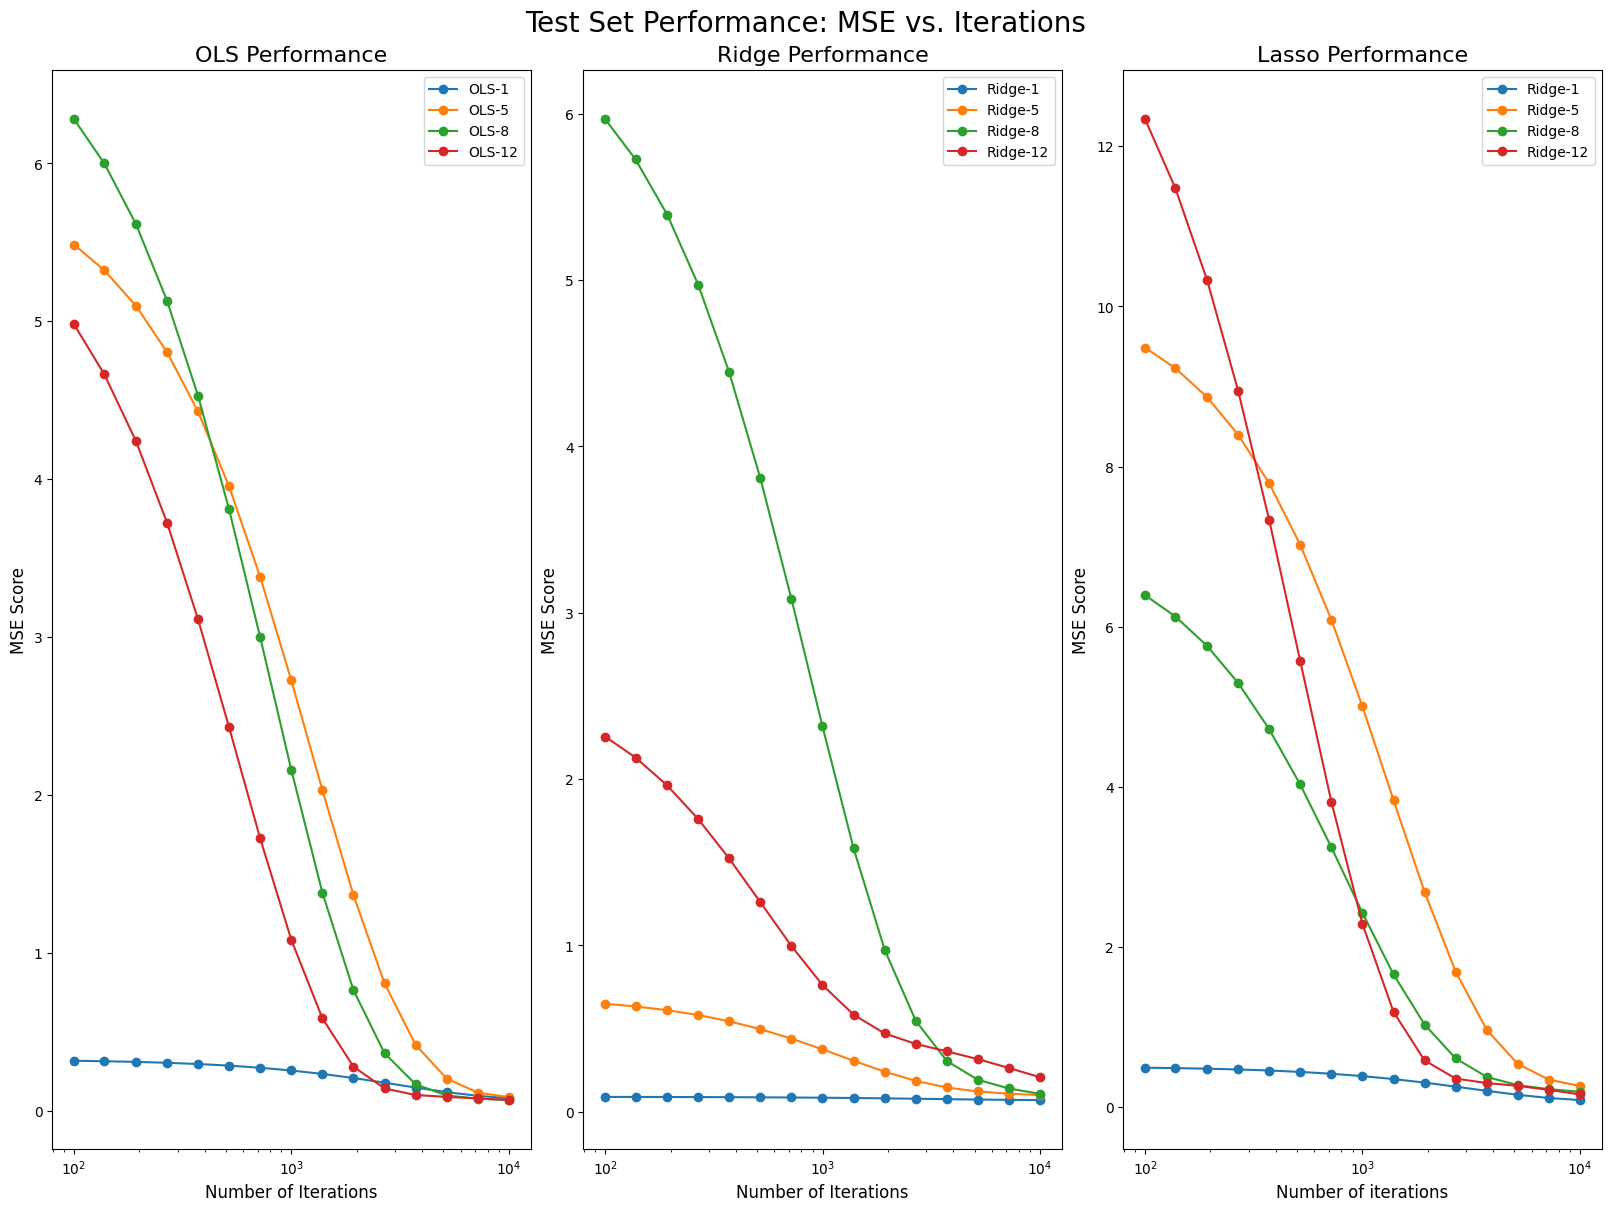

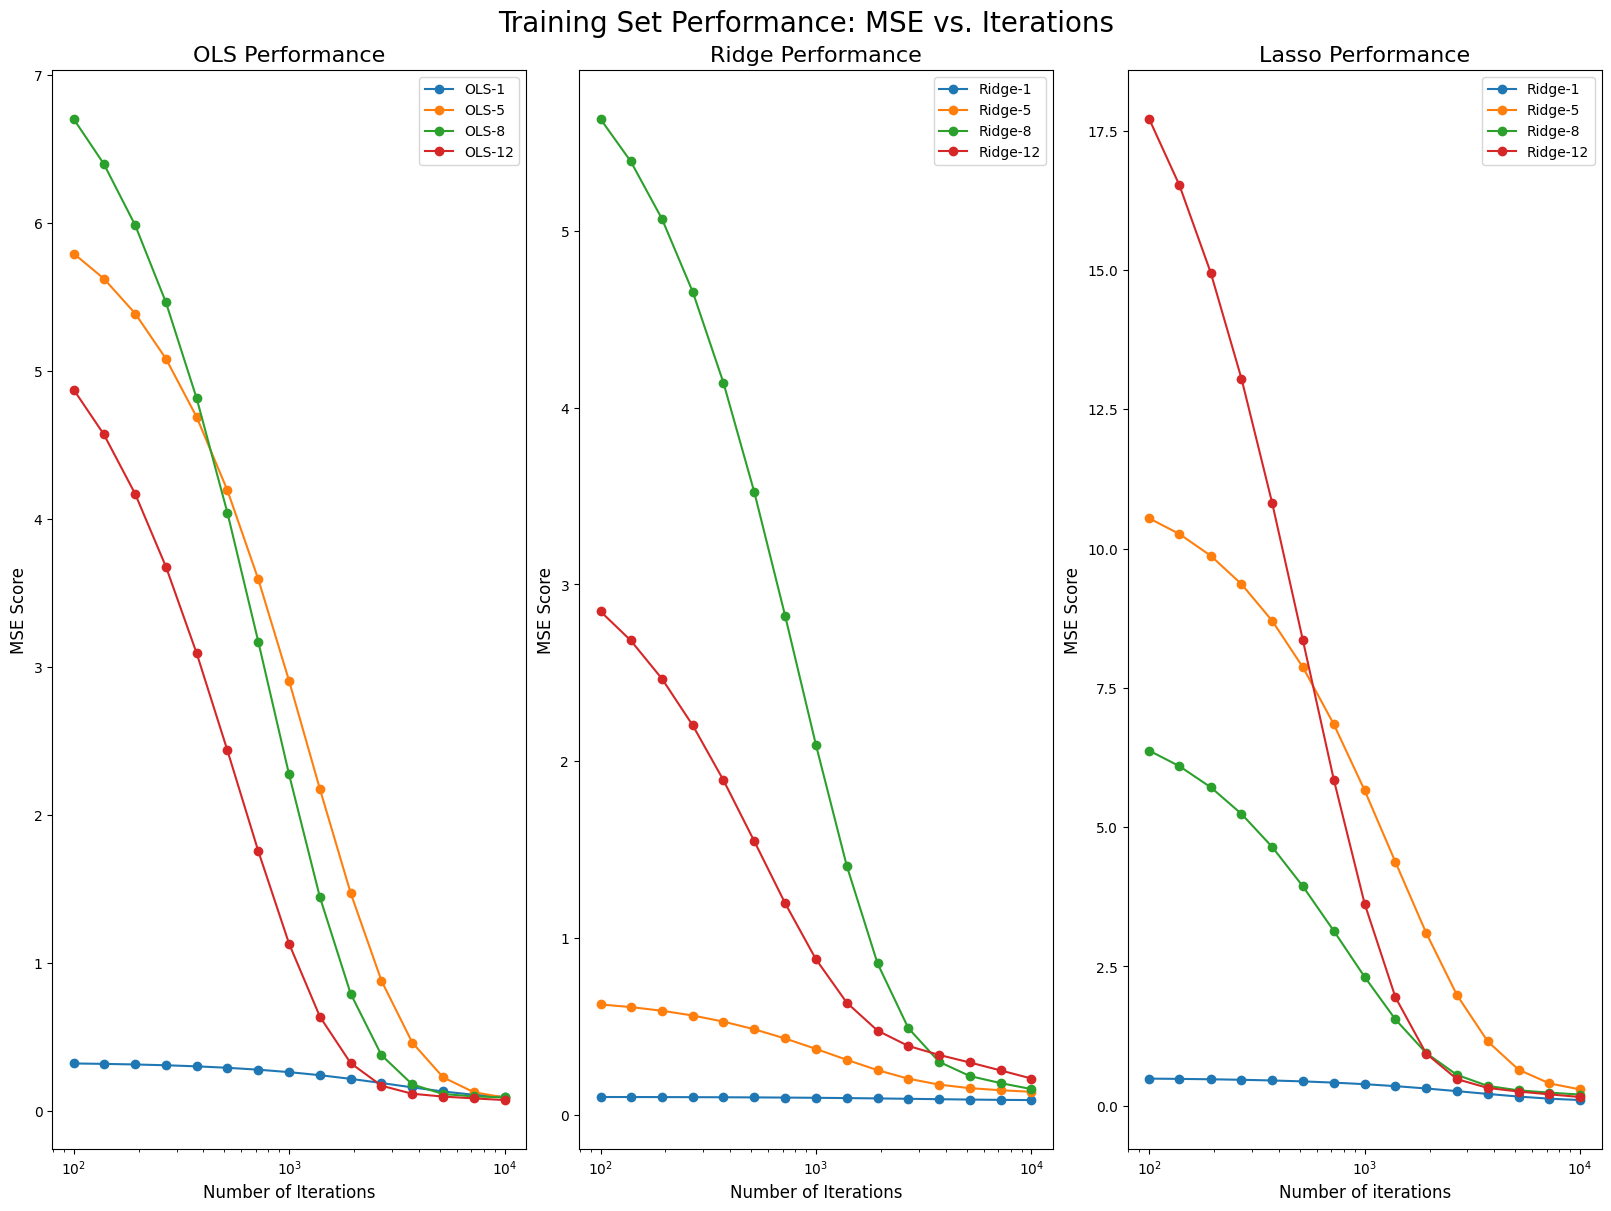

In [5]:
# Gradient descent parameters, learning rate eta first
eta = 0.0001
lam = 0.001
# Then number of iterations
num_iters = 10000
degrees = [1,5,8,12]
np.random.seed(42)
iter_saves = np.unique(np.logspace(2, np.log10(num_iters - 1), 15).astype(int))

# Initialize weights for gradient descent


# Gradient descent loop

plot_predict = {"OLS" : { },
                "Ridge" : {}, "Lasso" : {}}
plot_train = {"OLS":{ },
              "Ridge": { }, "Lasso": {}}
theta_store = {"OLS": {}, "Ridge": {}, "Lasso": {}}

y_centered = y - y.mean() 


for degree in degrees:
    X = polynomial_features(x, degree)
    scalar = StandardScaler()
    X = scalar.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y_centered, test_size=0.2, random_state=57)


    keys = ["OLS", "Ridge", "Lasso"]
    for key in keys: 
        plot_predict[key][degree] = { "mse":[], "r2" : []}
        plot_train[key][degree] = { "mse":[], "r2" : []}  
        theta_store[key][degree] = []
        theta = np.random.randn(X_train.shape[1],1)

        for t in range(num_iters):
            # Compute gradients for OSL and Ridge
            if key == "OLS":
                grad = Gradient_OLS(X_train, y_train, theta=theta)
            elif key =="Ridge":
                grad= Gradient_Ridge(X_train, y_train,  lambda_param=lam,theta=theta)
            elif key == "Lasso":
                grad = Gradient_OLS(X_train, y_train, theta=theta) + lam * np.sign(theta)
            theta -= eta * grad
            if t in iter_saves:
                y_pred = X_test @ theta
                y_train_pred= X_train @ theta
                plot_predict[key][degree]["mse"].append(MSE(y_test, y_pred))
                plot_predict[key][degree]["r2"].append(R2(y_test, y_pred))
                theta_store[key][degree].append(theta)
                plot_train[key][degree]["mse"].append(MSE(y_train, y_train_pred))
                plot_train[key][degree]["r2"].append(R2(y_train, y_train_pred))

def plot_mse_vs_iterations(results_dict, title):
    """Helper function to plot MSE vs. iterations."""
    fig, [ax1,ax2,ax3] = plt.subplots(1, 3, figsize=(16, 12), constrained_layout=True)
    fig.suptitle(title, fontsize=20)
    for degree in degrees:
        ax1.plot(iter_saves, results_dict["OLS"][degree]["mse"], 'o-', label=f"OLS-{degree}")

        ax2.plot(iter_saves, results_dict["Ridge"][degree]["mse"], 'o-', label=f"Ridge-{degree}")
        ax3.plot(iter_saves, results_dict["Lasso"][degree]["mse"], 'o-', label=f"Ridge-{degree}")
    
    ax1.set_title("OLS Performance", fontsize=16)
    ax1.set_xlabel("Number of Iterations", fontsize=12)
    ax1.set_xscale('log')
    ax1.set_ylabel("MSE Score", fontsize=12)
    ax1.legend(fontsize=10)

    ax2.set_title("Ridge Performance", fontsize=16)
    ax2.set_xlabel("Number of Iterations", fontsize=12)
    ax2.set_xscale('log')
    ax2.set_ylabel("MSE Score", fontsize=12)
    ax2.legend(fontsize=10)

    ax3.set_title("Lasso Performance", fontsize=16)
    ax3.set_xlabel("Number of Iterations", fontsize=12)
    ax3.set_xscale('log')
    ax3.set_ylabel("MSE Score", fontsize=12)
    ax3.legend(fontsize=10)

    plt.xlabel("Number of iterations")
    plt.show()

plot_mse_vs_iterations(plot_predict, "Test Set Performance: MSE vs. Iterations")
plot_mse_vs_iterations(plot_train, "Training Set Performance: MSE vs. Iterations")


Remember to test it with scikit lasso code, also have the legend on y be the same